In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [43]:
train_df=pd.read_csv('/content/SMS_train (1) (1).csv',encoding="ISO-8859-1")
test_df=pd.read_csv('/content/SMS_test (2) (1).csv',encoding="ISO-8859-1")

In [44]:
df=pd.concat([train_df,test_df],ignore_index=True)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [45]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [46]:
df.tail()

,S. No.,Message_body,Label
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
1081,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [47]:
df.isna().sum()

,0
S. No.,0
Message_body,0
Label,0


In [48]:
df.dtypes

,0
S. No.,int64
Message_body,object
Label,object


<Axes: xlabel='Message_body', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 145 (\x91) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151:

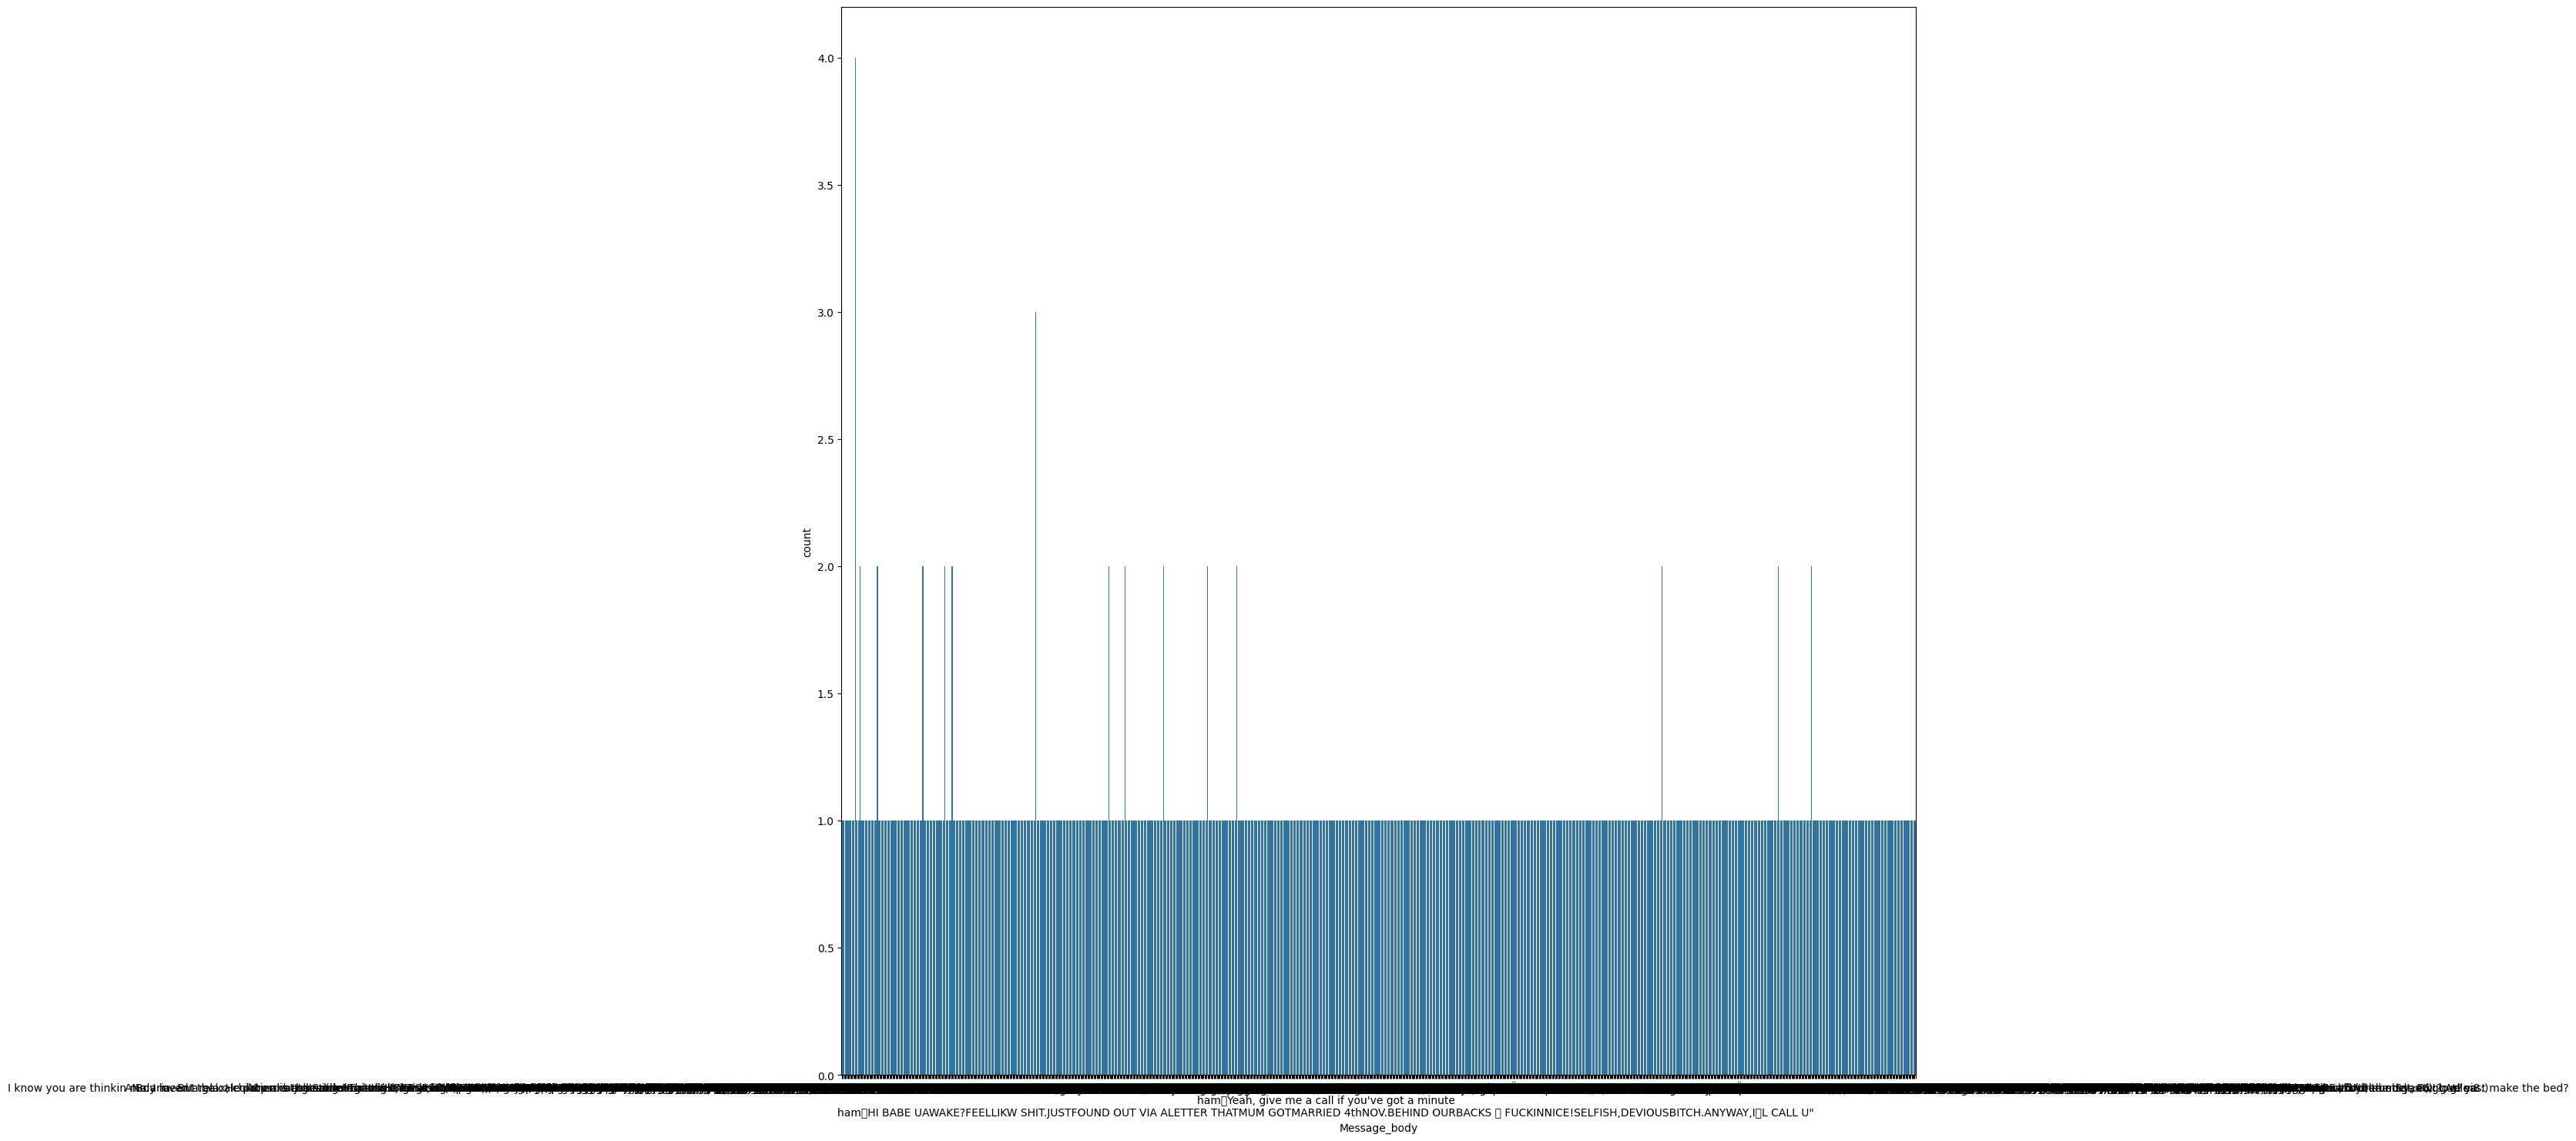

In [49]:
plt.figure(figsize=(18,18))
sns.countplot(x=df['Message_body'],data=df)

In [50]:
df.drop(['S. No.'],axis=1,inplace=True)
df.head()

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam


In [51]:
df['Label']=df['Label'].map({'Spam':1,"Non-Spam":0}).astype(int)
df.head()

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1


In [52]:
df.dtypes

,0
Message_body,object
Label,int64


In [53]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
message=df.Message_body
message

,Message_body
0,Rofl. Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity, * was in mood for that. So...any other s..."
3,Will ü b going to esplanade fr home?
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear. You read something f...
1079,Sun ah... Thk mayb can if dun have anythin on....
1080,"SYMPTOMS when U are in love: ""1.U like listeni..."


In [55]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
message=message.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
message

,Message_body
0,Rofl . Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity , * was in mood for that . So ... any oth..."
3,Will ü b going to esplanade fr home ?
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear . You read something ...
1079,Sun ah ... Thk mayb can if dun have anythin on...
1080,"SYMPTOMS when U are in love : "" 1 . U like lis..."


In [56]:
message=message.str.replace('[^A-Za-z0-9]',' ',regex=True)
message

,Message_body
0,Rofl Its true to its name
1,The guy did some bitching but I acted like i d...
2,Pity was in mood for that So any oth...
3,Will b going to esplanade fr home
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear You read something ...
1079,Sun ah Thk mayb can if dun have anythin on...
1080,SYMPTOMS when U are in love 1 U like lis...


In [57]:
from nltk.tokenize import TweetTokenizer
message=message.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w) >= 3]))
message

,Message_body
0,Rofl Its true its name
1,The guy did some bitching but acted like inter...
2,Pity was mood for that any other suggestions
3,Will going esplanade home
4,This the 2nd time have tried contact have won ...
...,...
1077,wonders WORLD 7th You 6th style 5th smile 4th ...
1078,Try something dear You read something for exams
1079,Sun Thk mayb can dun have anythin Thk have boo...
1080,SYMPTOMS when are love like listening songs ge...


In [60]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
message=message.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
message

,Message_body
0,rofl it true it name
1,the guy did some bitch but act like interest b...
2,piti was mood for that ani other suggest
3,will go esplanad home
4,this the 2nd time have tri contact have won th...
...,...
1077,wonder world 7th you 6th style 5th smile 4th p...
1078,tri someth dear you read someth for exam
1079,sun thk mayb can dun have anythin thk have boo...
1080,symptom when are love like listen song get sto...


In [61]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
message=message.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
message

,Message_body
0,rofl true name
1,guy bitch act like interest buy someth el next...
2,piti mood ani suggest
3,go esplanad home
4,2nd time tri contact 750 pound prize claim eas...
...,...
1077,wonder world 7th 6th style 5th smile 4th perso...
1078,tri someth dear read someth exam
1079,sun thk mayb dun anythin thk book lesson pilat...
1080,symptom love like listen song get stop see nam...


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(message)
data

<1082x2847 sparse matrix of type '<class 'numpy.float64'>'
	with 8873 stored elements in Compressed Sparse Row format>

In [63]:
print(data)

  (0, 2142)	0.6743246681420616
  (0, 2596)	0.5352804139572925
  (0, 1749)	0.5086856793431558
  (1, 1235)	0.26826339572857744
  (1, 558)	0.3752334020731641
  (1, 352)	0.35437558793533497
  (1, 1532)	0.2174075457753962
  (1, 1390)	0.3187189191538061
  (1, 627)	0.2751324774651613
  (1, 2326)	0.2751324774651613
  (1, 968)	0.30392006451010634
  (1, 1777)	0.26514476216742267
  (1, 2734)	0.22799692523276513
  (1, 1166)	0.32809784984076795
  (1, 1121)	0.1977601804079742
  (2, 1927)	0.5469696796701571
  (2, 1706)	0.5469696796701571
  (2, 417)	0.36716239650585775
  (2, 2423)	0.5165656915002457
  (3, 1191)	0.4955435583228749
  (3, 997)	0.7276196298199478
  (3, 1307)	0.47434824349351806
  (4, 176)	0.2662890952276137
  (4, 2536)	0.18930442900348937
  (4, 2592)	0.2094114975864192
  :	:
  (1079, 1521)	0.24774213284441401
  (1079, 2428)	0.26153957460502464
  (1079, 1722)	0.2706898396742334
  (1079, 1849)	0.2706898396742334
  (1079, 1922)	0.2706898396742334
  (1079, 1791)	0.2706898396742334
  (1079, 42

In [64]:
y=df['Label'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)
x_train

<757x2847 sparse matrix of type '<class 'numpy.float64'>'
	with 6266 stored elements in Compressed Sparse Row format>

In [66]:
x_test

<325x2847 sparse matrix of type '<class 'numpy.float64'>'
	with 2607 stored elements in Compressed Sparse Row format>

In [67]:
y_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [68]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
from sklearn.naive_bayes import MultinomialNB
mul=MultinomialNB()
from sklearn.svm import SVC
svc=SVC()

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
lst=[knn,mul,svc]

In [75]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Model is : ",i)
  print(y_pred)
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy Score : ")
  print(accuracy_score(y_test,y_pred))
  print("Classifiacation Report : ")
  print(classification_report(y_test,y_pred))
  print("*"*100)

Model is :  KNeighborsClassifier(n_neighbors=7)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Confusion Matrix : 
[[269   0]
 [ 54   2]]
Accuracy Score : 
0.8338461538461538
Classifiacation Report : 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       269
           1       1.00      0.04      0.07        56

    accuracy          